In [55]:
import numpy as np
import matplotlib.pyplot as plt
#This class has some cool sample data
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [56]:
np.random.seed(0)

In [57]:
n_pts = 500
#Randon state is our seed
#Noise is how messey the data will be, making harder/lighter for the learning process
#Factor is how small is the inner circle compared to the outer circle...
X,y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=.2)

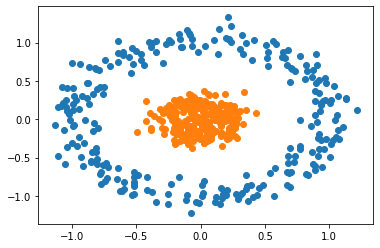

In [58]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [59]:
model = Sequential()
#Dense(4,input_shape(2,)) = 4 Nodes on the Hidden Layer, 2 Input nodes
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
#Output Layer, on that case we get 4 inputs(the output of our previous layer)
#It could be omitted, but givint it for better comprehension...
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
#Compiling the Model with 0.01 Learnign rate with Binary Cross Entropy
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [60]:
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 821us/step - loss: 0.7026 - accuracy: 0.4760
Epoch 2/100
25/25 [==============================] - 0s 841us/step - loss: 0.6926 - accuracy: 0.6280
Epoch 3/100
25/25 [==============================] - 0s 860us/step - loss: 0.6920 - accuracy: 0.6640
Epoch 4/100
25/25 [==============================] - 0s 860us/step - loss: 0.6909 - accuracy: 0.3940
Epoch 5/100
25/25 [==============================] - 0s 780us/step - loss: 0.6891 - accuracy: 0.5720
Epoch 6/100
25/25 [==============================] - 0s 800us/step - loss: 0.6869 - accuracy: 0.4740
Epoch 7/100
25/25 [==============================] - 0s 780us/step - loss: 0.6835 - accuracy: 0.6980
Epoch 8/100
25/25 [==============================] - 0s 780us/step - loss: 0.6800 - accuracy: 0.7240
Epoch 9/100
25/25 [==============================] - 0s 840us/step - loss: 0.6721 - accuracy: 0.8520
Epoch 10/100
25/25 [==============================] - 0s 761us/step - loss: 0.6624 - accura

Text(0.5, 1.0, 'accuracy')

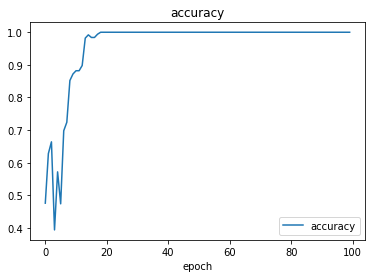

In [62]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

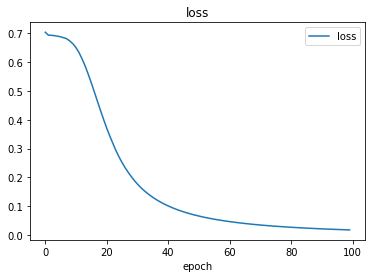

In [63]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [66]:
def plot_decision_boundary(X, Y, model):
    #+1 to have it more nicely on the chart... and we want to have a 50x50 grid 
    x_span = np.linspace(min(X[:,0]) -0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) -0.25 , max(X[:,1]) + 0.25, 50)
    xx,yy = np.meshgrid(x_span, y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    ##running prediction!
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)    
    plt.contourf(xx,yy,z)

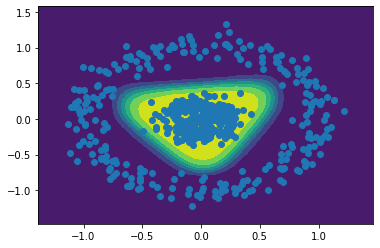

In [68]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is [[0.9810129]]


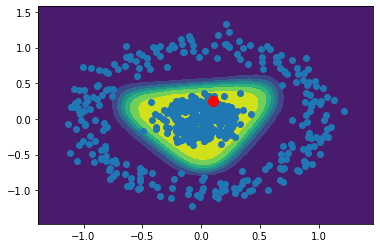

In [70]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

##Here we make a simulation for the point bellow!
x=0.1
y=0.25
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y], marker='o', markersize=10, color='red')
print('Prediction is', prediction)